# Importing Packages

In [3]:
from folium.plugins import HeatMap, MarkerCluster
from folium import Choropleth, Circle, Marker
from geopy.geocoders import Nominatim
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import folium
import math
import sys
import os

In [2]:
# sys.getrecursionlimit()
# import threading
# sys.setrecursionlimit(10**7) # max depth of recursion
# threading.stack_size(2**27)

0

# Importing Data

In [4]:
data_path = "crime_reports_cleaned.csv"

data = pd.read_csv(data_path)
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,LONGITUDE,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY
0,192070453,100,0,2019-09-03 23:25:00,2019,9,Tuesday,23,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,MIGRATED REPORT - CRIMINAL HOMICIDE,HOMICIDE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
1,212002782,520,0,2021-01-13 10:10:00,2021,1,Wednesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,BURGLARY - RESIDENTIAL - FORCE,RESIDENTIAL BURGLARY,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
2,212025886,614,0,2021-04-22 09:48:00,2021,4,Thursday,9,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY FROM MOTOR VEHICLE,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
3,212002485,801,0,2021-01-12 10:00:00,2021,1,Tuesday,10,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County
4,212016939,801,0,2021-03-17 02:41:00,2021,3,Wednesday,2,"(42.38135785377728, -71.03768162799254)",42.381358,-71.037682,ASSAULT - SIMPLE,SIMPLE ASSAULT,"{'house_number': '49', 'road': 'West Eagle Str...",West Eagle Street,Eagle Hill,East Boston,Boston,Suffolk County


# Adding Violent Column

In [22]:
violent_list = ['MIGRATED REPORT - CRIMINAL HOMICIDE',
       'BURGLARY - RESIDENTIAL - FORCE', 'ASSAULT - SIMPLE', 'VANDALISM',
       'MURDER, NON-NEGLIGIENT MANSLAUGHTER', 'ROBBERY - STREET',
       'ROBBERY - BANK', 'ROBBERY - OTHER',
       'MIGRATED REPORT - AGGRAVATED ASSAULT/AGGRAVATED ASSAULT & BATTERY',
       'ASSAULT - AGGRAVATED - BATTERY', 'ASSAULT - AGGRAVATED',
       'MIGRATED REPORT - BURGLARY/BREAKING AND ENTERING',
       'BURGLARY - RESIDENTIAL - ATTEMPT',
       'BURGLARY - RESIDENTIAL - NO FORCE',
       'BURGLARY - COMMERICAL - FORCE', 'BURGLARY - OTHER - NO FORCE',
       'MIGRATED REPORT - OTHER LARCENY', 'LARCENY PICK-POCKET',
       'LARCENY PURSE SNATCH - NO FORCE ', 'LARCENY SHOPLIFTING',
       'LARCENY THEFT OF BICYCLE', 'LARCENY THEFT FROM BUILDING',
       'LARCENY ALL OTHERS', 'BREAKING AND ENTERING (B&E) MOTOR VEHICLE',
       'MIGRATED REPORT - LARCENY FROM MV', 'ASSAULT SIMPLE - BATTERY',
       'GRAFFITI', 'WEAPON - FIREARM - CARRYING / POSSESSING, ETC',
       'WEAPON - OTHER - CARRYING / POSSESSING, ETC',
       'WEAPON - FIREARM - OTHER VIOLATION', 'FUGITIVE FROM JUSTICE',
       'FIRE REPORT - HOUSE, BUILDING, ETC.', 'WARRANT ARREST',
       'WARRANT ARREST - OUTSIDE OF BOSTON WARRANT',
       'FIRE REPORT - CAR, BRUSH, ETC.', 'MISSING PERSON - LOCATED',
       'MISSING PERSON - NOT REPORTED - LOCATED',
       'MIGRATED REPORT - ROBBERY', 'ROBBERY - COMMERCIAL',
       'ROBBERY - CAR JACKING', 'CHILD ENDANGERMENT (NO ASSAULT)',
       'CHILD ABANDONMENT (NO ASSAULT)', 'CHILD ENDANGERMENT',
       'MIGRATED REPORT - INVESTIGATE PROPERTY',
       'FIRE REPORT/ALARM - FALSE', 'ROBBERY - HOME INVASION', 'ARSON',
       'MIGRATED REPORT - WEAPONS VIOLATION', 'BOMB THREAT',
       'BURGLARY - COMMERICAL - ATTEMPT', 'HOME INVASION', 'STALKING',
       'BURGLARY - OTHER - FORCE',
       'WEAPON - FIREARM - SALE / TRAFFICKING',
       'MANSLAUGHTER - NON-VEHICLE - NEGLIGENCE',
       'MANSLAUGHTER - VEHICLE - NEGLIGENCE',
       'BURGLARY - COMMERICAL - NO FORCE',
       'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
       'LARCENY THEFT FROM COIN-OP MACHINE',
       'EXPLOSIVES - TURNED IN OR FOUND', 'CHINS',
       'CONTRIBUTING TO DELINQUENCY OF MINOR',
       'MANSLAUGHTER - TRAIN ETC. VICTIM NON-NEGLIGENCE',
       'ROBBERY - UNARMED - RESIDENCE', 'EXPLOSIVES - POSSESSION OR USE',
       'LARCENY IN A BUILDING UNDER $50', 'KILLING OF FELON BY POLICE',
       'PRISONER - SUICIDE / SUICIDE ATTEMPT', 'ROBBERY - KNIFE - STREET',
       'B&E NON-RESIDENCE NIGHT - FORCE',
       'MIGRATED REPORT - COUNTERFEITING/FORGERY',
       'ROBBERY ATTEMPT - KNIFE - BANK', 'LARCENY SHOPLIFTING UNDER $50',
       'B&E NON-RESIDENCE NIGHT - ATTEMPT FORCE', 'JUSTIFIABLE HOMICIDE',
       'BURGLARY - OTHER - ATTEMPT', 'ROBBERY - UNARMED - BUSINESS',
       'ROBBERY - UNARMED - CHAIN STORE', 'BIOLOGICAL THREATS',
       'ASSAULT & BATTERY D/W - OTHER', 'A&B ON POLICE OFFICER',
       'ASSAULT & BATTERY D/W - KNIFE',
       'PRISONER ESCAPE / ESCAPE & RECAPTURE',
       'LARCENY IN A BUILDING $50 TO $199', 'LARCENY OTHER $50 TO $199',
       'LARCENY SHOPLIFTING $50 TO $199',
       'B&E NON-RESIDENCE DAY - NO PROP TAKEN',
       'ROBBERY - UNARMED - STREET', 'LARCENY OTHER UNDER $50',
       'ASSAULT D/W - KNIFE ON POLICE OFFICER',
       'A&B HANDS, FEET, ETC.  - MED. ATTENTION REQ.',
       'PRISONER ATTEMPT TO RESCUE',
       'B&E RESIDENCE NIGHT - ATTEMPT FORCE',
       'B&E RESIDENCE DAY - NO PROP TAKEN']

In [23]:
data['VIOLENTT'] = np.where(data['OFFENSE_DESCRIPTION'].isin(violent_list),1,0)

In [24]:
data["VIOLENT"] = data["VIOLENT"].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595576 entries, 0 to 595575
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   INCIDENT_NUMBER      595576 non-null  object  
 1   OFFENSE_CODE         595576 non-null  int64   
 2   SHOOTING             595576 non-null  int64   
 3   OCCURRED_ON_DATE     595576 non-null  object  
 4   YEAR                 595576 non-null  int64   
 5   MONTH                595576 non-null  int64   
 6   DAY_OF_WEEK          595576 non-null  object  
 7   HOUR                 595576 non-null  int64   
 8   LOCATION             595576 non-null  object  
 9   LATITUDE             595576 non-null  float64 
 10  LONGITUDE            595576 non-null  float64 
 11  OFFENSE_DESCRIPTION  595576 non-null  object  
 12  OFFENSE_CODE_GROUP   595576 non-null  object  
 13  ADDRESS              595576 non-null  object  
 14  ROAD                 594569 non-null  object  
 15  

# Generating Count

In [25]:
new_data = data.groupby(['MONTH', 'YEAR', 'VIOLENT']).size().reset_index(name='counts')
new_data_2 = data.groupby(['MONTH', 'YEAR']).count().reset_index()

new_data_2

,MONTH,YEAR,INCIDENT_NUMBER,OFFENSE_CODE,SHOOTING,OCCURRED_ON_DATE,DAY_OF_WEEK,HOUR,LOCATION,LATITUDE,...,OFFENSE_DESCRIPTION,OFFENSE_CODE_GROUP,ADDRESS,ROAD,NEIGHBOURHOOD,SUBURB,CITY,COUNTY,VIOLENT,VIOLENTT
0,1,2016,7845,7845,7845,7845,7845,7845,7845,7845,...,7845,7845,7845,7841,4937,6929,7843,7845,7845,7845
1,1,2017,7997,7997,7997,7997,7997,7997,7997,7997,...,7997,7997,7997,7980,5126,7103,7993,7997,7997,7997
2,1,2018,7826,7826,7826,7826,7826,7826,7826,7826,...,7826,7826,7826,7813,4866,7037,7824,7826,7826,7826
3,1,2019,6933,6933,6933,6933,6933,6933,6933,6933,...,6933,6933,6933,6922,4375,6006,6929,6933,6933,6933
4,1,2020,6340,6340,6340,6340,6340,6340,6340,6340,...,6340,6340,6340,6327,3972,5827,6339,6340,6340,6340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,12,2017,7545,7545,7545,7545,7545,7545,7545,7545,...,7545,7545,7545,7533,4755,6734,7543,7545,7545,7545
78,12,2018,7689,7689,7689,7689,7689,7689,7689,7689,...,7689,7689,7689,7682,4710,6895,7684,7689,7689,7689
79,12,2019,6281,6281,6281,6281,6281,6281,6281,6281,...,6281,6281,6281,6270,3899,5711,6278,6281,6281,6281
80,12,2020,5601,5601,5601,5601,5601,5601,5601,5601,...,5601,5601,5601,5590,3425,5050,5601,5601,5601,5601


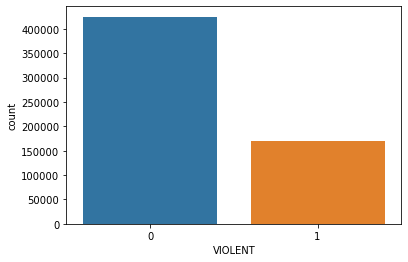

In [30]:
fig = sns.countplot(data=data, x = "VIOLENT")
fig = fig.get_figure()

In [31]:
fig.savefig("VIOLENT_Crimes_Countplot.png") 

# Latitude and Longitude Pre-processing

In [32]:
data['LONGITUDE'] = data['LONGITUDE'].replace(r'\s+', np.nan, regex=True)
data['LONGITUDE'] = data['LONGITUDE'].replace(r'^$', np.nan, regex=True)
data['LONGITUDE'] = data['LONGITUDE'].fillna(-0.99999)
data['LONGITUDE'] = pd.to_numeric(data['LONGITUDE'])
data['LATITUDE'] = data['LATITUDE'].replace(r'\s+', np.nan, regex=True)
data['LATITUDE'] = data['LATITUDE'].replace(r'^$', np.nan, regex=True)
data['LATITUDE'] = data['LATITUDE'].fillna(-0.99999)
data['LATITUDE'] = pd.to_numeric(data['LATITUDE'])

# Heatmap for 2020 and 2021

In [34]:
heatmap2020 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2020 = data[data["YEAR"] == 2020]
heat_data_2020 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2020.iterrows()]

HeatMap(data = heat_data_2020, radius = 10).add_to(heatmap2020)

In [52]:
heatmap2020.save('crime_2020.html')

In [55]:
heatmap2021 = folium.Map(location = [42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2021 = data[data["YEAR"] == 2021]
heat_data_2021 = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2021.iterrows()]

HeatMap(data = heat_data_2021, radius = 10).add_to(heatmap2021)

heatmap2021.save('crime_2021.html')

# Cluster for 2020 and 2021

In [56]:
clustermap2020 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2020.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clustermap2020.add_child(mc)

clustermap2020.save('crime_2020_clustermap.html')

In [57]:
clustermap2021 = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=13)

mc = MarkerCluster()

for idx, row in data2021.iterrows():
    if not math.isnan(row['LONGITUDE']) and not math.isnan(row['LATITUDE']):
        mc.add_child(Marker([row['LATITUDE'], row['LONGITUDE']]))

clustermap2021.add_child(mc)

clustermap2021.save('crime_2021_clustermap.html')

# Comparing Violent and Non-violent crimes in 2021

In [58]:
heatmap2021_v = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2021 = data[data["YEAR"] == 2021]
data2021_v = data2021[data2021["VIOLENT"] == 1]

heat_data_2021_v = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2021_v.iterrows()]

HeatMap(data = heat_data_2021_v, radius = 10).add_to(heatmap2021_v)

heatmap2021_v.save('violent_crime_2021_heatmap.html')

In [59]:
heatmap2021_nv = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=12)

data2021_nv = data2021[data2021["VIOLENT"] == 0]

heat_data_2021_nv = [[row['LATITUDE'],row['LONGITUDE']] for index, row in data2021_nv.iterrows()]

HeatMap(data = heat_data_2021_nv, radius = 10).add_to(heatmap2021_nv)

heatmap2021_nv.save('nonviolent_crime_2021_heatmap.html')

# Crime Category

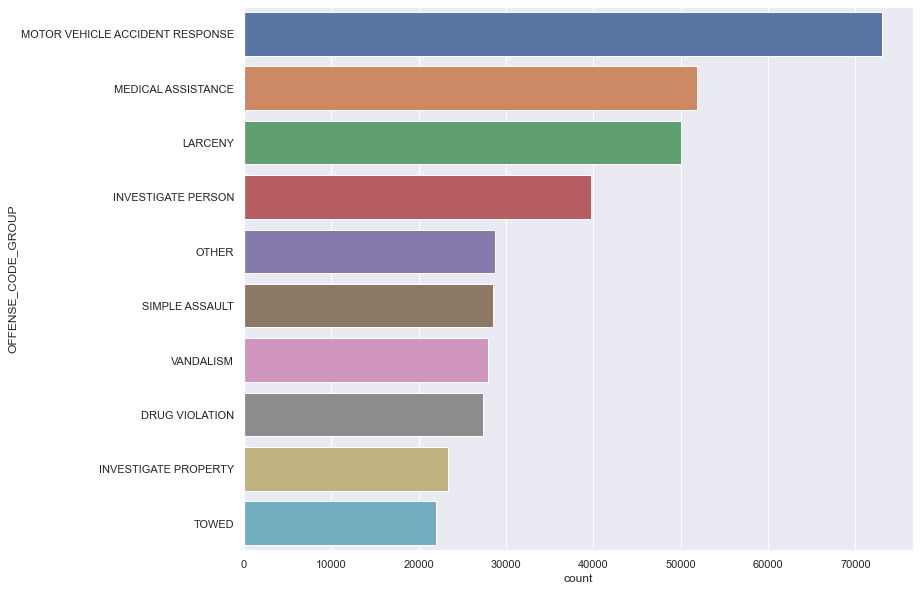

In [45]:
sns.set(rc={'figure.figsize':(12, 10)})

fig = sns.countplot(y = "OFFENSE_CODE_GROUP",
              data = data, 
              order = data.OFFENSE_CODE_GROUP.value_counts().iloc[:10].index)
fig = fig.get_figure()
fig.savefig("Type_of_Crimes_Countplot.png") 